# The Elements of Quantitative Investing by Giuseppe A. Paleologo

## chapter 1: map and terriroty
## chapter 2: univariate returns

[*********************100%***********************]  4 of 4 completed

Ticker          AAPL  GOOGL        IBM       MSFT
Date                                             
2000-01-03  0.840094    NaN  57.730152  35.668087
2000-01-04  0.769266    NaN  55.770596  34.463215
2000-01-05  0.780523    NaN  57.730152  34.826584
2000-01-06  0.712978    NaN  56.734795  33.659969
2000-01-07  0.746751    NaN  56.485958  34.099838


<Figure size 1000x600 with 0 Axes>

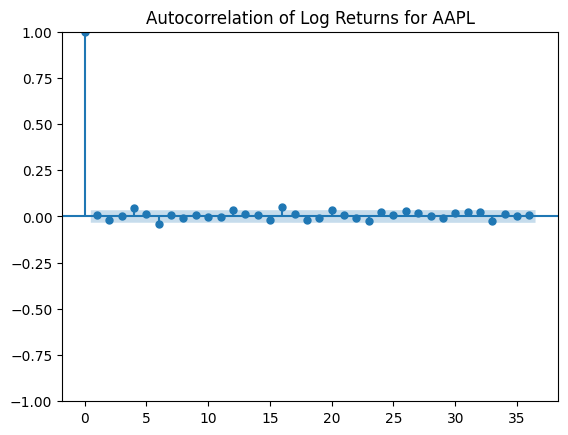

<Figure size 1000x600 with 0 Axes>

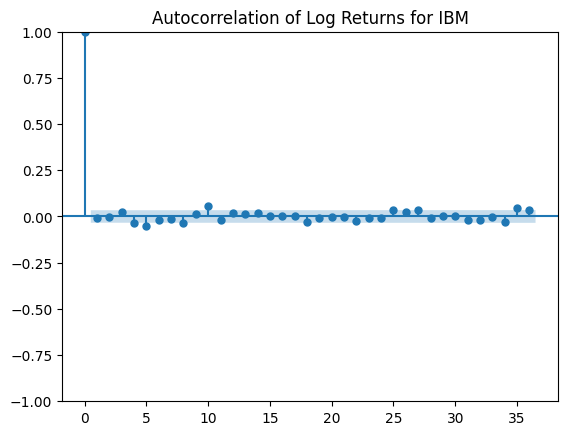

<Figure size 1000x600 with 0 Axes>

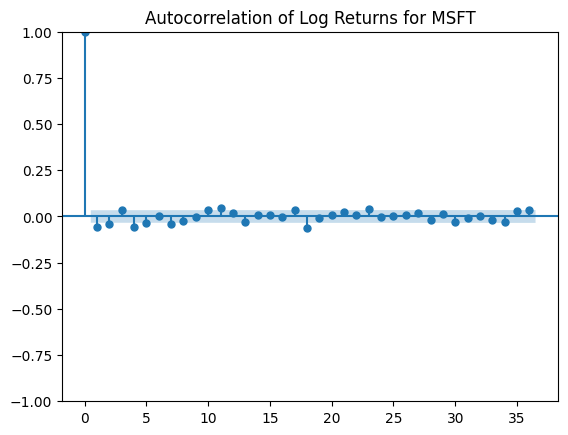

<Figure size 1000x600 with 0 Axes>

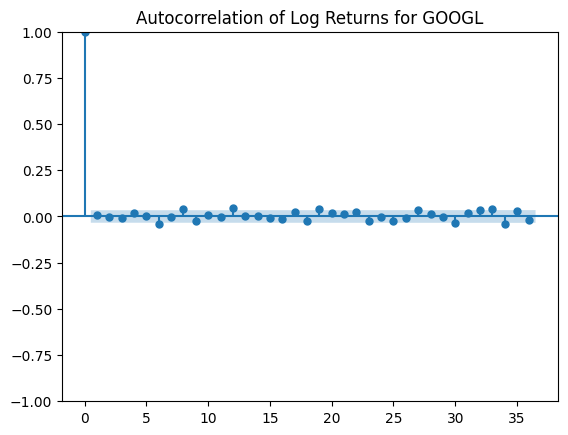

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
from finance_utils import yf, np, pd, plt

tickers = ['AAPL', 'IBM', 'MSFT', 'GOOGL']
start_date = '2000-01-03'
end_date = '2017-12-09'

data = yf.download(tickers, start=start_date, end=end_date, auto_adjust = False)['Adj Close']
print(data.head())

log_returns = np.log(data/ data.shift(1)).dropna()

for ticker in tickers:
    plt.figure(figsize=(10, 6))
    plot_acf(log_returns[ticker], alpha = 0.05, title = f'Autocorrelation of Log Returns for {ticker}')
    plt.show()



/Users/terencechiu/miniforge3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004404. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


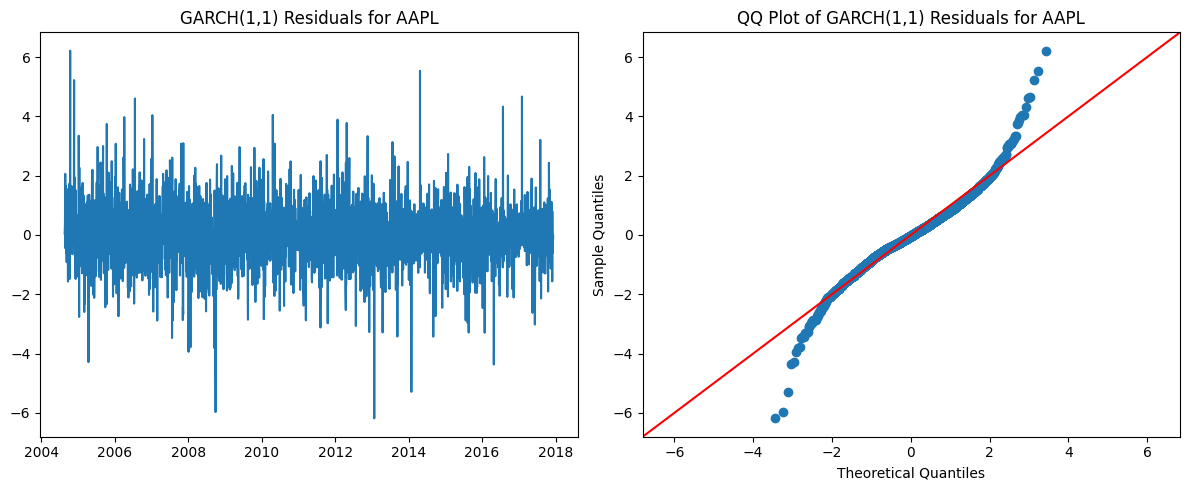

/Users/terencechiu/miniforge3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001752. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


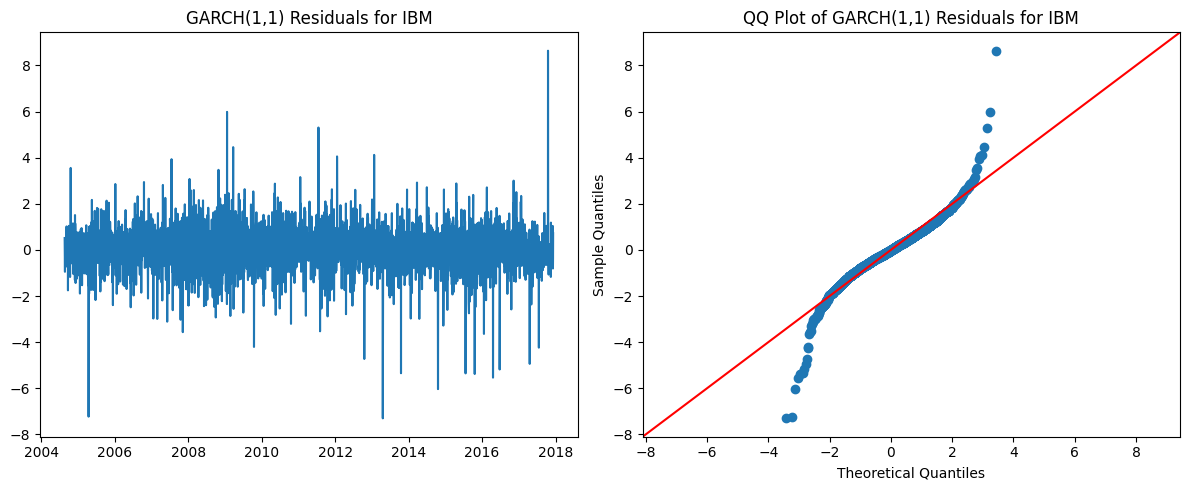

/Users/terencechiu/miniforge3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002651. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


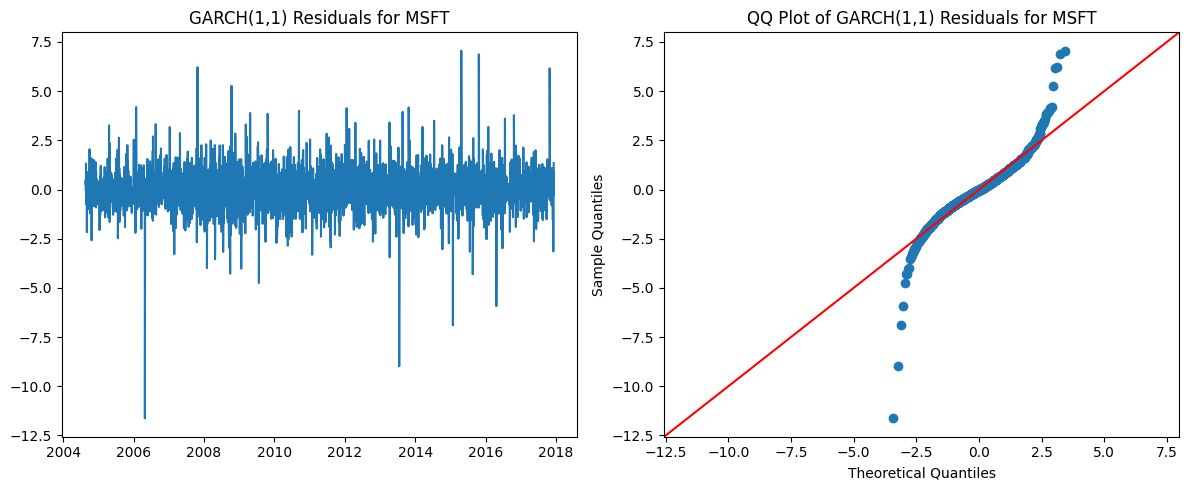

/Users/terencechiu/miniforge3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003641. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


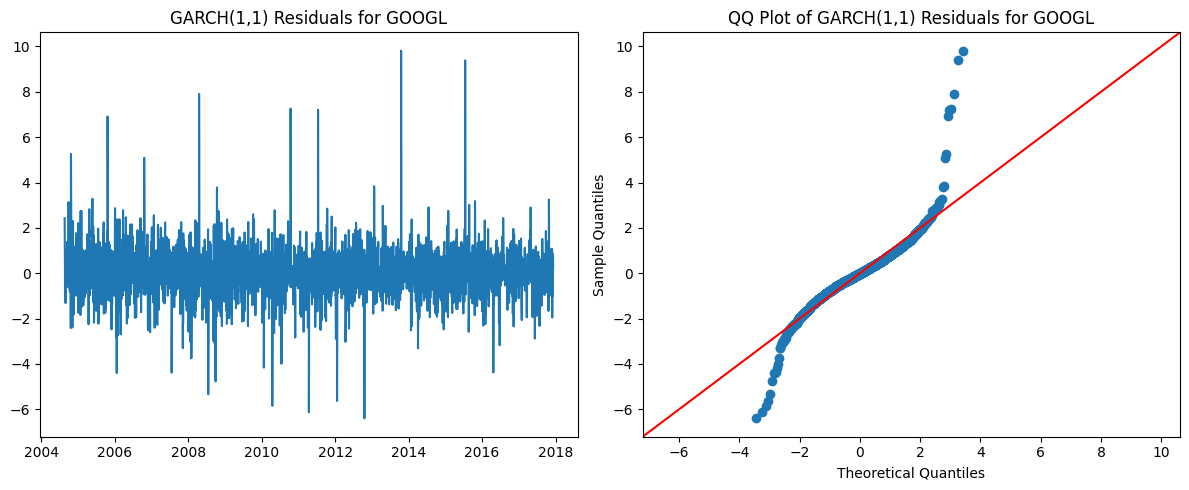

In [8]:
from statsmodels.graphics.gofplots import qqplot
from arch import arch_model

for ticker in tickers:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Fit GARCH(1,1) model and get residuals
    am = arch_model(log_returns[ticker], vol='Garch', p=1, q=1)
    res = am.fit(disp='off')
    garch_resid = res.resid / res.conditional_volatility
    
    # Time series plot of GARCH residuals
    axes[0].plot(garch_resid)
    axes[0].set_title(f'GARCH(1,1) Residuals for {ticker}')
    
    # QQ plot for GARCH residuals
    qqplot(garch_resid, line='45', ax=axes[1])
    axes[1].set_title(f'QQ Plot of GARCH(1,1) Residuals for {ticker}')
    
    plt.tight_layout()
    plt.show()